In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Preparation

In [3]:


df=pd.read_csv('customers.csv ')
df



,ID,Gender,Age,Profession,Income,Spending_Score,Segmentation
0,1,Male,22,Healthcare,58138,Low,D
1,2,Female,38,Engineer,46344,Average,A
2,3,Female,67,Engineer,71613,Low,B
3,4,Male,67,Lawyer,26646,High,B
4,5,Female,40,Entertainment,58293,High,A
...,...,...,...,...,...,...,...
2211,2212,Male,37,Entertainment,61223,Average,C
2212,2213,Male,27,Doctor,64014,Low,B
2213,2214,Male,48,Artist,56981,Average,B
2214,2215,Female,25,Marketing,69245,Low,D


In [44]:
df.head()

,ID,Gender,Age,Profession,Income,Spending_Score,Segmentation
0,1,Male,22,Healthcare,58138,Low,D
1,2,Female,38,Engineer,46344,Average,A
2,3,Female,67,Engineer,71613,Low,B
3,4,Male,67,Lawyer,26646,High,B
4,5,Female,40,Entertainment,58293,High,A


In [45]:
df.tail()

,ID,Gender,Age,Profession,Income,Spending_Score,Segmentation
2211,2212,Male,37,Entertainment,61223,Average,C
2212,2213,Male,27,Doctor,64014,Low,B
2213,2214,Male,48,Artist,56981,Average,B
2214,2215,Female,25,Marketing,69245,Low,D
2215,2216,Female,56,Doctor,52869,Low,A


In [4]:
df.isnull().sum()

ID                 0
Gender             0
Age                0
Profession        37
Income             0
Spending_Score     0
Segmentation       0
dtype: int64

In [5]:
data=df.fillna(method="bfill")
data.isnull().sum()

ID                0
Gender            0
Age               0
Profession        0
Income            0
Spending_Score    0
Segmentation      0
dtype: int64

In [6]:
#convert string values in columns 
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['Gender']=le.fit_transform(data['Gender'])
data.head()

,ID,Gender,Age,Profession,Income,Spending_Score,Segmentation
0,1,1,22,Healthcare,58138,Low,D
1,2,0,38,Engineer,46344,Average,A
2,3,0,67,Engineer,71613,Low,B
3,4,1,67,Lawyer,26646,High,B
4,5,0,40,Entertainment,58293,High,A


In [7]:
data['Profession']=le.fit_transform(data['Profession'])
data['Spending_Score']=le.fit_transform(data['Spending_Score'])
data['Segmentation']=le.fit_transform(data['Segmentation'])
data.head()

,ID,Gender,Age,Profession,Income,Spending_Score,Segmentation
0,1,1,22,5,58138,2,3
1,2,0,38,2,46344,0,0
2,3,0,67,2,71613,2,1
3,4,1,67,7,26646,1,1
4,5,0,40,3,58293,1,0


# EDA

array([[<Axes: title={'center': 'ID'}>,
        <Axes: title={'center': 'Gender'}>,
        <Axes: title={'center': 'Age'}>],
       [<Axes: title={'center': 'Profession'}>,
        <Axes: title={'center': 'Income'}>,
        <Axes: title={'center': 'Spending_Score'}>],
       [<Axes: title={'center': 'Segmentation'}>, <Axes: >, <Axes: >]],
      dtype=object)

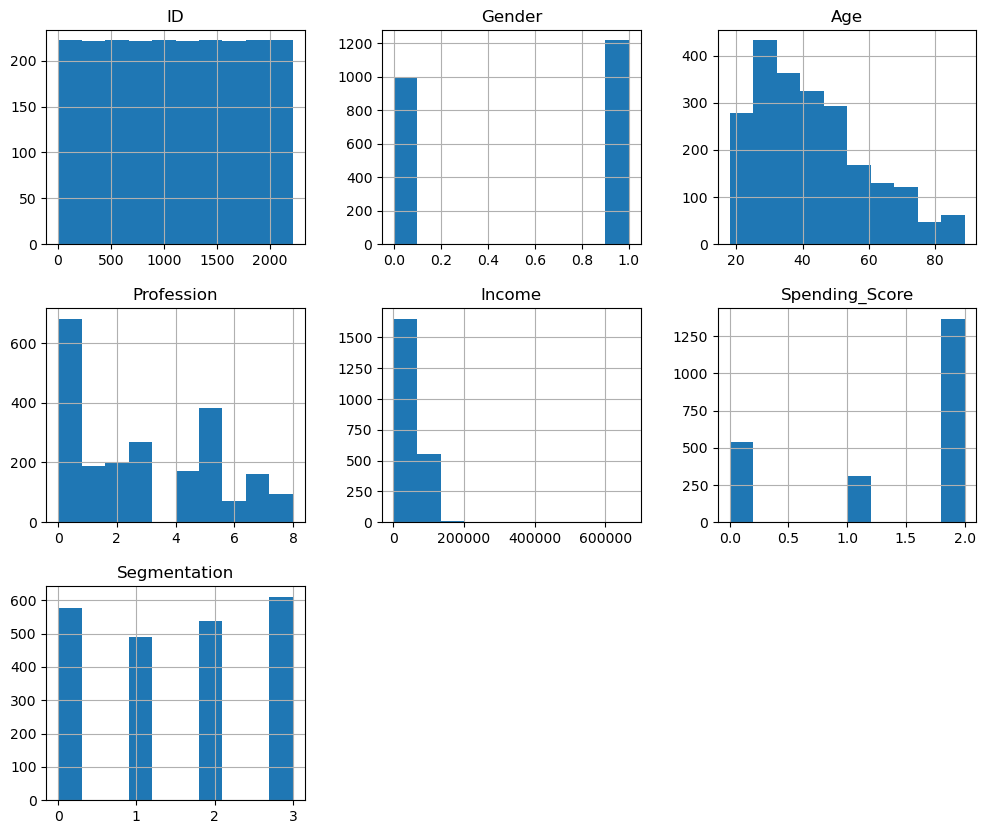

In [8]:


data.hist(figsize=(12,10))



<Axes: >

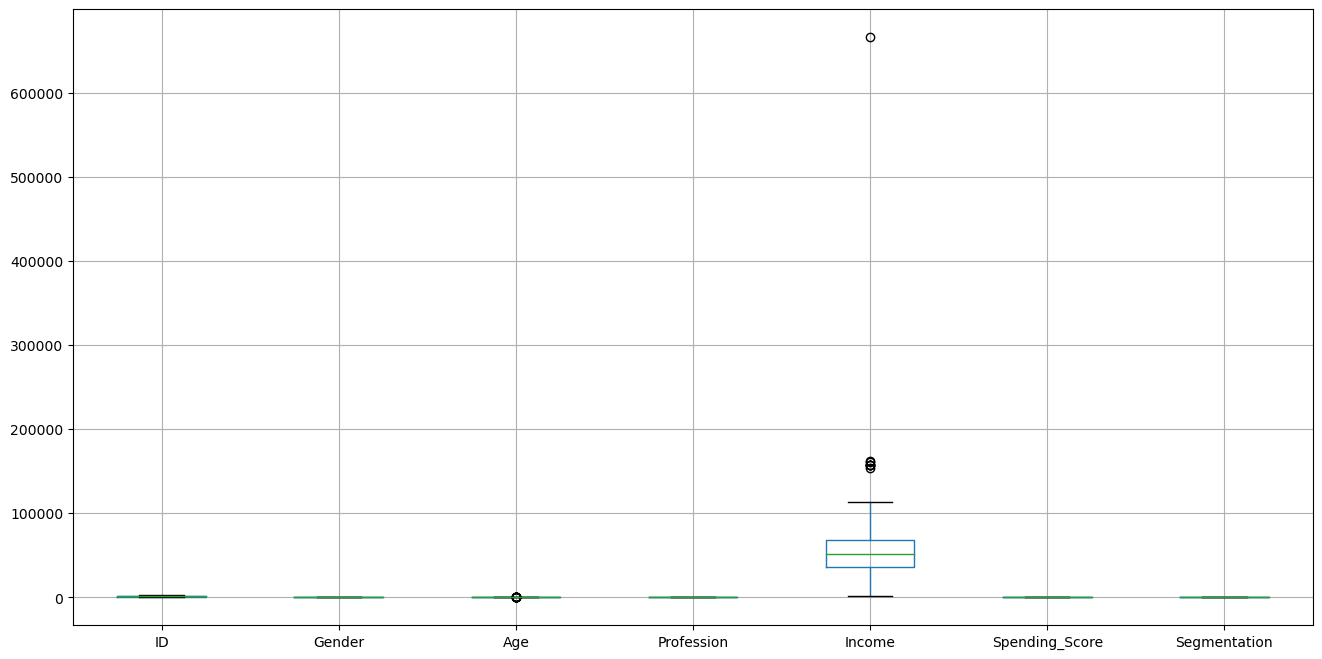

In [46]:


data.boxplot(figsize=(16,8))



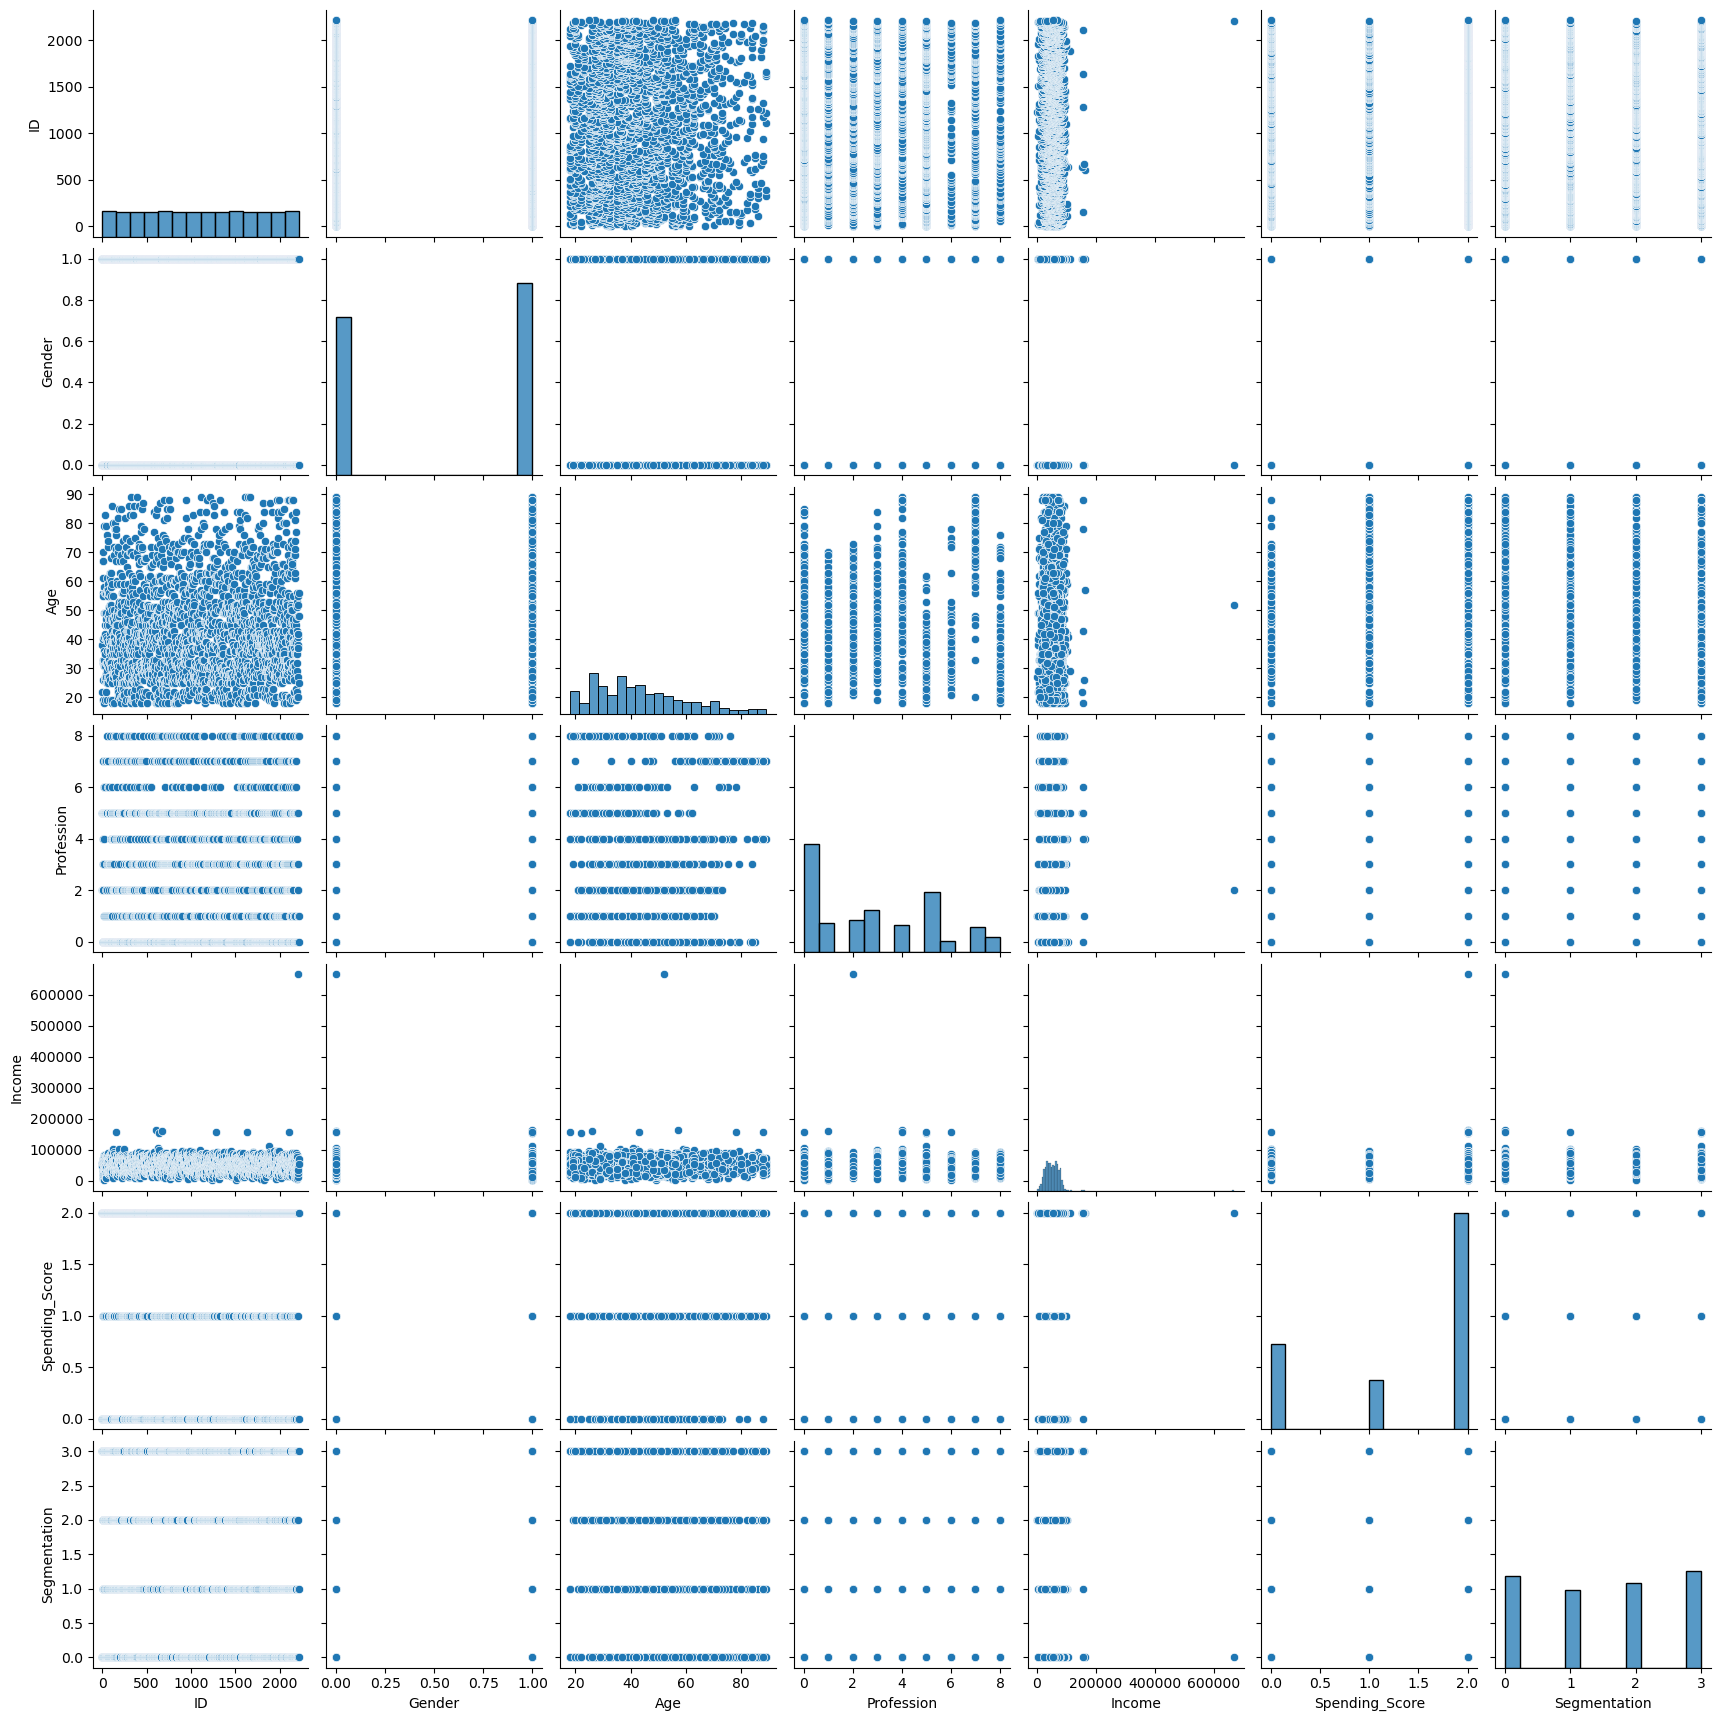

In [9]:


sns.pairplot(data)



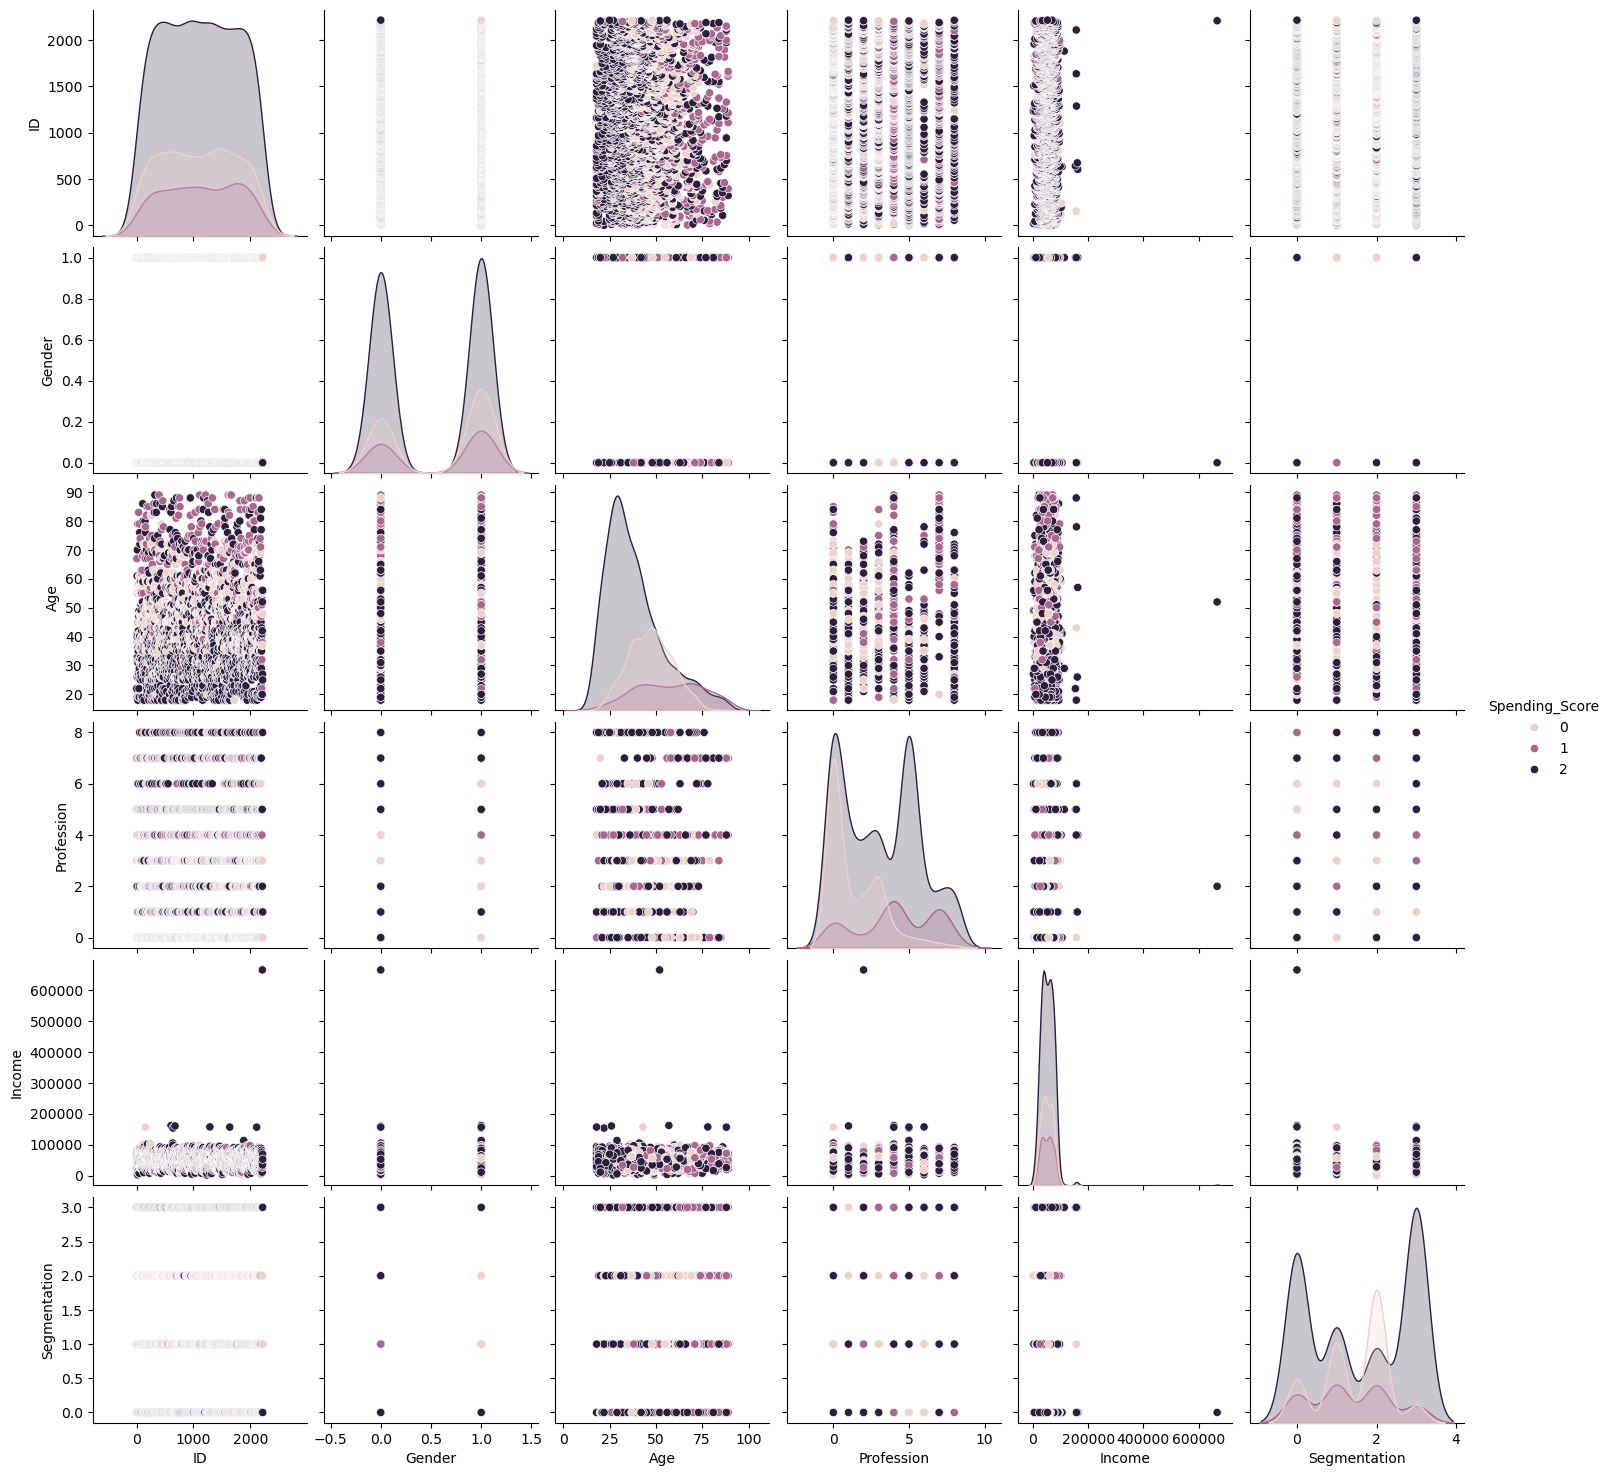

In [10]:
sns.pairplot(data,hue='Spending_Score')

# X and Y values

In [47]:
from sklearn.model_selection import train_test_split

In [48]:
x=data.iloc[:,:-1]
x.head(3)

,ID,Gender,Age,Profession,Income,Spending_Score
0,1,1,22,5,58138,2
1,2,0,38,2,46344,0
2,3,0,67,2,71613,2


In [49]:
y=data.iloc[:,-1:]
y.head(3)

,Segmentation
0,3
1,0
2,1


In [50]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [51]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2)
print('******************Training Data shape***************\n')
print('Training data-x-Shape:\t',xtrain.shape)
print()
print('Training data-y-Shape:\t',ytrain.shape)
print()
print('******************Testing Data shape*****************\n')
print('Testing data(x-Input) shape:\t',xtest.shape)
print()
print('Testing data(y-outcome)shape:\t',ytest.shape)

******************Training Data shape***************

Training data-x-Shape:	 (1772, 6)

Training data-y-Shape:	 (1772, 1)

******************Testing Data shape*****************

Testing data(x-Input) shape:	 (444, 6)

Testing data(y-outcome)shape:	 (444, 1)


# Knn model Building with n = 3

In [52]:
#Train the model
knn_model=KNeighborsClassifier(n_neighbors=3)
print('********************KNN Classifier Model**********************')
print("Training Started.......\n")
print()
knn_model.fit(xtrain,ytrain)
print('Training completed.....')
print()
#test the data
print('Testing invoked......\n')
ypred=knn_model.predict(xtest)
print('Predicted Class Labels are: \n',ypred)
print('\nTesting is also completed....\n')

********************KNN Classifier Model**********************
Training Started.......


Training completed.....

Testing invoked......

Predicted Class Labels are: 
 [0 1 0 0 2 1 1 1 1 0 3 1 0 0 2 0 0 1 0 1 0 0 0 0 1 0 0 0 3 1 0 2 0 0 2 3 0
 2 1 1 3 0 1 1 2 1 1 0 0 1 1 0 2 0 3 1 1 1 3 3 1 0 3 1 0 2 0 0 0 0 3 3 0 0
 1 0 2 0 2 0 0 0 0 0 3 0 1 0 0 2 0 0 0 1 3 0 0 3 0 0 3 2 0 0 0 1 2 1 1 1 3
 3 0 2 1 1 0 2 0 0 3 1 2 1 1 2 3 3 0 0 0 2 2 0 0 0 0 0 0 1 1 0 0 3 0 0 0 0
 0 0 0 0 3 0 0 2 1 0 3 0 3 0 0 1 1 0 0 1 0 1 0 1 0 2 3 2 1 1 2 0 1 0 3 0 1
 0 3 1 2 1 0 1 0 0 1 1 0 3 0 3 3 0 0 1 2 1 0 0 0 0 3 0 2 1 0 1 3 0 1 2 3 1
 1 0 2 1 0 3 3 2 0 2 1 3 3 0 0 3 0 2 0 1 0 3 3 0 0 3 1 2 0 0 1 0 3 0 0 3 0
 0 3 0 2 0 0 0 0 2 3 3 1 3 3 0 3 1 0 3 1 3 2 1 2 0 0 1 0 1 1 0 0 0 3 0 1 0
 0 0 0 2 0 3 1 0 0 0 1 1 0 3 2 0 0 0 0 2 2 0 0 2 0 0 3 1 1 1 0 0 0 0 2 3 0
 0 0 3 3 0 0 3 3 0 0 2 1 0 0 0 0 0 0 3 0 1 0 2 0 1 0 0 0 2 3 1 1 1 0 1 0 3
 1 0 0 1 2 0 1 0 1 0 0 1 3 3 0 0 1 0 3 2 2 1 2 0 0 0 1 1 0 1 0 0 1 1 1 1 0
 1 1 1 0

C:\Users\Charanteja\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [53]:
print('Accuracy Score:\t',accuracy_score(ytest,ypred))
print()
print('Confusion Matrix:\n',confusion_matrix(ytest,ypred))
print()
print('Classification Report:\n',classification_report(ytest,ypred))

Accuracy Score:	 0.2635135135135135

Confusion Matrix:
 [[62 36  7 17]
 [44 25 13 19]
 [50 23 15 20]
 [56 25 17 15]]

Classification Report:
               precision    recall  f1-score   support

           0       0.29      0.51      0.37       122
           1       0.23      0.25      0.24       101
           2       0.29      0.14      0.19       108
           3       0.21      0.13      0.16       113

    accuracy                           0.26       444
   macro avg       0.26      0.26      0.24       444
weighted avg       0.26      0.26      0.24       444



# Scaling the Data

In [18]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc_x=sc.fit_transform(x)
sc_y=sc.fit_transform(y)

In [54]:
sc_train_x=sc.fit_transform(xtrain)
sc_train_x

array([[ 1.53680164,  0.89795327, -0.73128869,  0.85934043, -0.68134758,
         0.73854553],
       [ 1.20111542,  0.89795327, -0.36208496, -1.12340858,  0.58299358,
         0.73854553],
       [-1.69262413,  0.89795327, -1.46969616,  0.85934043,  0.40987026,
         0.73854553],
       ...,
       [-1.57451231, -1.11364369, -0.42361892, -1.12340858, -0.17003342,
         0.73854553],
       [ 0.37433269,  0.89795327, -0.42361892,  0.46279063,  0.64295187,
        -1.60470009],
       [ 0.18006983, -1.11364369,  0.49939041, -1.12340858, -0.53308221,
         0.73854553]])

In [55]:
sc_test_x=sc.fit_transform(xtest)
sc_test_x

array([[ 0.24869976,  0.93880559, -0.21834996, -1.0928088 ,  0.42711994,
         0.73159627],
       [-0.80961862, -1.06518326, -0.79473154, -1.0928088 , -0.25391124,
         0.73159627],
       [ 0.152489  , -1.06518326, -0.96764601, -0.70985134, -2.36496161,
         0.73159627],
       ...,
       [ 0.0386396 ,  0.93880559, -1.42875127,  0.82197852, -1.32701554,
         0.73159627],
       [ 1.0103683 ,  0.93880559, -0.04543548, -1.0928088 , -0.81375276,
         0.73159627],
       [ 0.97028048,  0.93880559,  1.45315662,  0.05606359,  1.2334937 ,
         0.73159627]])

# KNN model with n= 3 (after scaling)

In [56]:
#Train the model
knn_model_sc=KNeighborsClassifier(n_neighbors=3)
print('********************KNN Classifier Model(after scaling)**********************')
print("Training Started.......\n")
print()
knn_model_sc.fit(sc_train_x,ytrain)
print('Training completed.....')
print()
#test the data
print('Testing invoked......\n')
ypred_sc=knn_model_sc.predict(sc_test_x)
print('Predicted Class Labels are: \n',ypred_sc)
print('\nTesting is also completed....\n')

********************KNN Classifier Model(after scaling)**********************
Training Started.......


Training completed.....

Testing invoked......

Predicted Class Labels are: 
 [1 3 0 3 0 0 3 2 0 1 1 1 0 0 1 3 3 0 1 2 1 1 3 0 3 3 0 1 3 2 3 1 2 0 0 1 3
 0 2 3 0 0 2 3 0 2 0 0 0 0 0 1 1 3 0 0 1 2 2 3 2 0 0 1 0 2 1 2 0 3 0 2 0 2
 3 1 3 3 0 2 0 0 3 0 1 3 0 0 1 2 2 0 1 2 3 3 0 3 2 2 1 2 3 0 0 0 1 1 1 0 3
 2 3 3 1 2 1 3 2 2 0 3 3 1 1 0 2 0 3 3 0 2 3 1 1 0 2 3 0 0 0 2 1 0 2 0 3 1
 3 2 0 2 1 0 0 3 1 0 3 0 2 1 3 3 0 0 0 0 0 0 0 1 0 0 0 3 3 2 0 1 0 1 2 3 0
 1 1 0 1 0 3 0 0 0 3 3 0 0 0 0 0 0 3 3 2 1 0 3 1 1 1 2 1 2 2 0 0 0 1 0 3 3
 0 3 3 3 0 1 3 0 0 1 0 0 3 0 3 1 2 0 2 3 1 0 3 0 2 3 0 0 1 2 0 3 0 1 3 0 0
 0 0 1 0 1 1 0 1 0 1 2 1 0 2 1 0 1 1 0 2 3 3 0 3 0 0 1 0 3 0 0 3 0 1 2 2 0
 2 1 1 0 0 0 3 0 1 3 2 1 0 1 2 1 1 0 0 1 3 0 0 3 0 0 3 2 3 0 3 3 0 0 1 1 0
 0 2 2 1 3 2 0 0 3 0 0 0 3 0 1 0 0 3 3 3 3 2 2 1 1 2 3 0 1 0 2 2 0 3 1 3 1
 0 0 3 0 3 0 0 3 0 0 0 3 1 0 2 0 0 0 0 1 2 0 0 3 1 3 2 1 3 0 3 2 0 0

C:\Users\Charanteja\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [57]:
#performance measures
print('Accuracy Score:\t',accuracy_score(ytest,ypred_sc))
print()
print('Confusion Matrix:\n',confusion_matrix(ytest,ypred_sc))
print()
print('Classification Report:\n',classification_report(ytest,ypred_sc))

Accuracy Score:	 0.44594594594594594

Confusion Matrix:
 [[71 28  7 16]
 [47 26 18 10]
 [33 21 40 14]
 [34 15  3 61]]

Classification Report:
               precision    recall  f1-score   support

           0       0.38      0.58      0.46       122
           1       0.29      0.26      0.27       101
           2       0.59      0.37      0.45       108
           3       0.60      0.54      0.57       113

    accuracy                           0.45       444
   macro avg       0.47      0.44      0.44       444
weighted avg       0.47      0.45      0.44       444



# KNN model with n= 5 (after scaling)

In [59]:
#Train the model
knn_model_sc=KNeighborsClassifier(n_neighbors=5)
print('********************KNN Classifier Model(after scaling)**********************')
print("Training Started.......\n")
print()
knn_model_sc.fit(sc_train_x,ytrain)
print('Training completed.....')
print()
#test the data
print('Testing invoked......\n')
ypred_sc=knn_model_sc.predict(sc_test_x)
print('Predicted Class Labels are: \n',ypred_sc)
print('\nTesting is also completed....\n')

print("*"*100)

#performance measures
print("Performance Metrics")
print()
print('Accuracy Score:\t',accuracy_score(ytest,ypred_sc))
print()
print('Confusion Matrix:\n',confusion_matrix(ytest,ypred_sc))
print()
print('Classification Report:\n',classification_report(ytest,ypred_sc))

********************KNN Classifier Model(after scaling)**********************
Training Started.......


Training completed.....

Testing invoked......

Predicted Class Labels are: 
 [1 0 0 3 1 0 3 1 0 3 2 1 3 1 1 3 3 3 1 1 1 2 3 1 3 3 3 0 3 2 3 1 2 0 0 2 0
 1 2 3 0 0 2 3 0 2 0 0 1 2 0 1 1 3 0 0 1 2 2 3 2 0 1 1 0 2 1 1 0 3 0 2 0 2
 3 1 3 3 1 2 0 2 3 0 1 3 0 0 1 2 2 3 1 2 3 3 0 3 2 2 1 0 3 0 0 0 1 1 1 1 3
 2 3 3 1 2 1 3 0 2 0 3 3 1 0 0 2 3 0 3 0 2 3 1 1 0 2 2 0 0 0 0 1 0 0 2 3 3
 3 2 1 2 1 1 0 3 3 0 3 0 2 1 2 3 0 0 2 0 0 0 0 2 1 1 0 3 3 0 1 0 0 2 2 3 0
 1 1 0 3 0 3 0 3 0 3 0 0 0 0 0 0 3 3 3 2 1 0 3 1 0 1 2 1 2 2 0 0 0 0 3 3 3
 0 3 3 3 0 1 3 0 0 1 1 3 3 0 0 1 2 2 2 3 1 0 0 1 2 3 2 0 1 1 0 3 0 1 3 3 2
 0 0 1 0 1 1 0 1 0 1 2 1 0 2 1 3 2 1 0 2 3 3 1 3 0 0 1 2 3 0 0 3 0 1 2 2 0
 2 0 3 0 0 0 3 0 1 3 2 0 0 1 2 1 0 0 1 1 3 0 0 3 0 0 3 2 3 0 3 3 2 0 3 2 3
 3 2 2 1 3 2 3 0 3 3 0 0 3 0 1 1 0 2 3 2 3 2 2 1 1 2 3 0 1 0 2 2 0 3 1 3 1
 3 0 0 0 3 0 0 3 0 2 0 3 0 0 2 3 2 0 1 1 2 1 0 3 0 3 2 3 2 2 1 2 1 0

C:\Users\Charanteja\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


# KNN model with n= 7 (after scaling)

In [61]:
#Train the model
knn_model_sc=KNeighborsClassifier(n_neighbors=7)
print('********************KNN Classifier Model(after scaling)**********************')
print("Training Started.......\n")
print()
knn_model_sc.fit(sc_train_x,ytrain)
print('Training completed.....')
print()
#test the data
print('Testing invoked......\n')
ypred_sc=knn_model_sc.predict(sc_test_x)
print('Predicted Class Labels are: \n',ypred_sc)
print('\nTesting is also completed....\n')

print("*"*100)

#performance measures
print("Performance Metrics")
print()
print('Accuracy Score:\t',accuracy_score(ytest,ypred_sc))
print()
print('Confusion Matrix:\n',confusion_matrix(ytest,ypred_sc))
print()
print('Classification Report:\n',classification_report(ytest,ypred_sc))

********************KNN Classifier Model(after scaling)**********************
Training Started.......


Training completed.....

Testing invoked......

Predicted Class Labels are: 
 [0 0 2 3 1 0 3 2 0 2 2 1 3 3 1 3 3 3 2 1 0 2 1 1 3 3 3 0 3 2 3 1 2 0 0 1 3
 1 2 3 0 3 2 3 0 2 0 0 1 2 0 1 0 3 0 0 1 2 2 0 2 0 2 1 2 0 1 1 0 3 0 2 0 2
 3 1 3 3 1 2 0 2 0 3 1 3 0 3 1 2 2 3 1 2 3 3 0 3 3 2 1 0 0 1 0 0 1 1 1 0 3
 1 3 3 1 2 1 3 0 2 0 3 3 1 0 0 2 0 0 3 2 2 3 1 1 0 2 1 0 0 0 0 1 0 0 2 3 3
 3 2 3 2 1 1 0 3 0 0 3 0 1 2 3 3 0 0 2 0 0 0 0 2 1 1 0 3 3 0 1 0 0 2 2 3 0
 1 1 0 0 0 2 0 3 0 3 0 0 0 1 0 0 3 3 3 2 1 0 3 0 1 1 2 1 2 2 0 0 0 0 3 3 3
 0 3 3 3 0 1 3 0 2 1 1 1 3 0 0 1 2 2 2 3 2 0 3 3 2 0 0 2 1 1 0 3 0 1 3 3 2
 0 0 1 0 2 1 0 1 1 1 2 1 1 2 3 3 2 1 0 2 3 3 0 3 0 0 1 2 3 0 0 3 0 1 2 2 0
 0 1 3 0 0 1 3 0 1 3 2 0 0 1 2 1 0 0 1 1 3 0 0 3 0 0 3 2 3 0 3 3 1 0 3 1 0
 3 2 2 3 3 2 3 0 3 1 0 0 3 0 3 1 0 2 0 1 3 2 2 1 1 2 3 0 1 0 2 2 0 3 1 3 1
 3 0 0 0 3 0 0 3 1 0 0 3 0 0 2 3 2 0 1 1 2 1 3 3 0 3 2 3 3 2 3 2 0 0

C:\Users\Charanteja\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


# KNN model with n= 9 (after scaling)

In [63]:
#Train the model
knn_model_sc=KNeighborsClassifier(n_neighbors=9)
print('********************KNN Classifier Model(after scaling)**********************')
print("Training Started.......\n")
print()
knn_model_sc.fit(sc_train_x,ytrain)
print('Training completed.....')
print()
#test the data
print('Testing invoked......\n')
ypred_sc=knn_model_sc.predict(sc_test_x)
print('Predicted Class Labels are: \n',ypred_sc)
print('\nTesting is also completed....\n')

print("*"*100)

#performance measures
print("Performance Metrics")
print()
print('Accuracy Score:\t',accuracy_score(ytest,ypred_sc))
print()
print('Confusion Matrix:\n',confusion_matrix(ytest,ypred_sc))
print()
print('Classification Report:\n',classification_report(ytest,ypred_sc))

********************KNN Classifier Model(after scaling)**********************
Training Started.......


Training completed.....

Testing invoked......

Predicted Class Labels are: 
 [1 0 0 3 1 0 3 2 0 2 2 1 3 0 2 3 3 3 1 1 0 2 3 2 3 3 3 0 3 2 3 0 2 0 0 2 3
 2 2 3 0 3 2 3 0 2 0 0 1 0 0 2 0 3 0 0 1 2 2 0 2 3 2 1 2 2 1 1 0 3 0 2 0 2
 3 0 3 3 1 2 0 2 0 0 1 3 0 0 2 2 2 3 1 2 3 3 0 3 3 2 1 0 0 1 0 1 1 1 1 0 3
 2 3 3 1 2 2 3 3 2 0 3 3 1 0 0 2 0 3 3 2 2 3 1 0 0 2 1 0 0 1 0 1 0 0 1 3 0
 3 2 3 2 1 1 0 3 0 0 3 0 1 2 3 3 0 0 2 0 0 0 0 2 1 0 0 3 3 0 0 0 0 1 2 3 0
 1 1 0 0 0 3 0 1 0 3 0 0 1 1 0 2 3 3 3 2 3 0 3 0 1 0 1 1 2 2 0 0 0 0 3 3 3
 0 3 0 3 2 1 3 3 0 1 2 1 3 0 1 1 2 2 2 3 1 0 3 3 1 0 2 2 0 1 0 3 3 0 3 0 2
 0 0 1 0 2 0 0 1 1 1 2 1 0 2 3 3 2 1 0 2 3 3 0 3 0 0 1 0 0 0 0 3 0 1 2 2 0
 0 1 0 0 0 1 3 0 1 3 2 0 0 1 2 2 0 0 1 2 3 0 0 3 0 0 3 2 0 0 3 3 1 3 3 1 0
 3 2 2 3 3 2 3 0 3 3 0 0 3 0 3 2 0 2 0 1 3 2 2 1 1 2 3 0 1 3 2 2 3 3 1 3 1
 3 0 0 0 3 0 0 3 1 0 0 3 0 0 2 3 2 0 1 1 3 1 3 3 0 3 2 3 3 2 3 2 3 0

C:\Users\Charanteja\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


# KNN model with n= 11 (after scaling)

In [65]:
#Train the model
knn_model_sc=KNeighborsClassifier(n_neighbors=11)
print('********************KNN Classifier Model(after scaling)**********************')
print("Training Started.......\n")
print()
knn_model_sc.fit(sc_train_x,ytrain)
print('Training completed.....')
print()
#test the data
print('Testing invoked......\n')
ypred_sc=knn_model_sc.predict(sc_test_x)
print('Predicted Class Labels are: \n',ypred_sc)
print('\nTesting is also completed....\n')

print("*"*100)

#performance measures
print("Performance Metrics")
print()
print('Accuracy Score:\t',accuracy_score(ytest,ypred_sc))
print()
print('Confusion Matrix:\n',confusion_matrix(ytest,ypred_sc))
print()
print('Classification Report:\n',classification_report(ytest,ypred_sc))

********************KNN Classifier Model(after scaling)**********************
Training Started.......


Training completed.....

Testing invoked......

Predicted Class Labels are: 
 [0 0 0 3 1 2 3 1 0 2 2 1 3 0 2 3 3 3 2 0 0 2 3 0 3 3 3 0 3 2 3 0 2 0 0 2 3
 2 2 3 0 0 2 3 0 2 0 0 0 0 0 2 0 3 0 0 1 2 2 0 2 3 2 1 2 0 1 1 0 3 0 2 0 2
 3 0 3 3 1 2 0 1 0 0 1 3 0 0 2 2 2 3 1 2 3 3 0 3 3 2 1 0 0 1 0 1 1 1 1 0 3
 2 3 3 1 2 2 2 3 2 0 3 3 2 0 1 2 0 3 3 2 2 3 1 0 0 2 2 0 0 0 0 1 0 0 2 3 0
 3 2 3 2 1 1 0 0 3 0 1 0 0 2 3 3 0 3 2 0 0 0 0 2 1 0 0 3 3 0 0 0 0 2 2 3 2
 1 2 0 0 0 3 0 1 0 3 3 0 1 1 0 2 3 3 3 2 3 0 3 0 1 0 2 1 2 2 0 0 0 0 3 3 3
 0 3 1 3 1 1 3 0 0 1 2 1 3 0 1 1 2 2 2 3 2 0 3 0 2 0 0 2 0 1 0 3 3 0 3 0 2
 0 0 1 0 2 0 0 1 1 1 2 1 1 2 3 3 2 1 0 2 3 3 2 3 0 0 1 2 0 0 0 3 0 1 2 2 0
 0 1 0 0 0 1 3 0 1 3 2 1 0 1 1 2 0 0 2 0 3 0 0 3 0 0 3 2 0 0 3 3 1 0 3 1 0
 3 2 2 0 3 2 3 0 3 3 0 0 3 0 3 2 0 2 0 1 3 2 2 1 1 2 3 0 1 3 2 2 3 3 1 3 1
 3 0 0 0 3 0 0 3 1 0 0 3 0 0 2 3 2 0 1 1 3 1 0 3 0 3 2 3 3 2 3 2 3 0

C:\Users\Charanteja\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


# Hyper parameter tuning to find best value of k

In [66]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier


In [83]:
#Specify the range of k values within which we wish to search.
param_grid = {'n_neighbors': range(1, 11)}

In [84]:
knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn_model, param_grid, cv=10, scoring='accuracy')
grid_search.fit(sc_train_x,ytrain)


C:\Users\Charanteja\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Charanteja\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Charanteja\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Charanteja\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the 

C:\Users\Charanteja\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Charanteja\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Charanteja\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Charanteja\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the 

C:\Users\Charanteja\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Charanteja\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Charanteja\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Charanteja\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the 

GridSearchCV(cv=10, estimator=KNeighborsClassifier(n_neighbors=3),
             param_grid={'n_neighbors': range(1, 11)}, scoring='accuracy')

In [85]:
best_k=grid_search.best_params_['n_neighbors']
best_k

9

# Building KNN model with Best k value

In [86]:
#Train the model
knn_model_sc=KNeighborsClassifier(best_k)
print('********************KNN Classifier Model(after scaling)**********************')
print("Training Started.......\n")
print()
knn_model_sc.fit(sc_train_x,ytrain)
print('Training completed.....')
print()
#test the data
print('Testing invoked......\n')
ypred_sc=knn_model_sc.predict(sc_test_x)
print('Predicted Class Labels are: \n',ypred_sc)
print('\nTesting is also completed....\n')

print("*"*100)

#performance measures
print("Performance Metrics")
print()
print('Accuracy Score:\t',accuracy_score(ytest,ypred_sc))
print()
print('Confusion Matrix:\n',confusion_matrix(ytest,ypred_sc))
print()
print('Classification Report:\n',classification_report(ytest,ypred_sc))

********************KNN Classifier Model(after scaling)**********************
Training Started.......


Training completed.....

Testing invoked......

Predicted Class Labels are: 
 [1 0 0 3 1 0 3 2 0 2 2 1 3 0 2 3 3 3 1 1 0 2 3 2 3 3 3 0 3 2 3 0 2 0 0 2 3
 2 2 3 0 3 2 3 0 2 0 0 1 0 0 2 0 3 0 0 1 2 2 0 2 3 2 1 2 2 1 1 0 3 0 2 0 2
 3 0 3 3 1 2 0 2 0 0 1 3 0 0 2 2 2 3 1 2 3 3 0 3 3 2 1 0 0 1 0 1 1 1 1 0 3
 2 3 3 1 2 2 3 3 2 0 3 3 1 0 0 2 0 3 3 2 2 3 1 0 0 2 1 0 0 1 0 1 0 0 1 3 0
 3 2 3 2 1 1 0 3 0 0 3 0 1 2 3 3 0 0 2 0 0 0 0 2 1 0 0 3 3 0 0 0 0 1 2 3 0
 1 1 0 0 0 3 0 1 0 3 0 0 1 1 0 2 3 3 3 2 3 0 3 0 1 0 1 1 2 2 0 0 0 0 3 3 3
 0 3 0 3 2 1 3 3 0 1 2 1 3 0 1 1 2 2 2 3 1 0 3 3 1 0 2 2 0 1 0 3 3 0 3 0 2
 0 0 1 0 2 0 0 1 1 1 2 1 0 2 3 3 2 1 0 2 3 3 0 3 0 0 1 0 0 0 0 3 0 1 2 2 0
 0 1 0 0 0 1 3 0 1 3 2 0 0 1 2 2 0 0 1 2 3 0 0 3 0 0 3 2 0 0 3 3 1 3 3 1 0
 3 2 2 3 3 2 3 0 3 3 0 0 3 0 3 2 0 2 0 1 3 2 2 1 1 2 3 0 1 3 2 2 3 3 1 3 1
 3 0 0 0 3 0 0 3 1 0 0 3 0 0 2 3 2 0 1 1 3 1 3 3 0 3 2 3 3 2 3 2 3 0

C:\Users\Charanteja\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
